In [1]:
import scanpy as sc
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scvi
import torch

In [2]:
import warnings
warnings.simplefilter("ignore", FutureWarning)
warnings.simplefilter("ignore", UserWarning)
warnings.simplefilter("ignore", RuntimeWarning)

In [9]:
from scipy import stats

In [3]:
adata = sc.read('annotated.h5ad')
adata

AnnData object with n_obs × n_vars = 58015 × 14469
    obs: 'samples', 'condition', 'location', 'n_genes', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_20_genes', 'pct_counts_mt', 'pct_counts_ribo', 'pct_counts_hb', 'low_label', 'low_score', '_scvi_batch', '_scvi_labels', 'overcluster', 'low_major', 'Cell_Type'
    var: 'n_cells'
    uns: '_scvi_manager_uuid', '_scvi_uuid', 'log1p', 'low_major_colors', 'neighbors', 'overcluster', 'rank_genes_groups', 'umap'
    obsm: 'X_scVI', 'X_umap', '_scvi_extra_categorical_covs', '_scvi_extra_continuous_covs'
    layers: 'counts'
    obsp: 'connectivities', 'distances'

In [4]:
subset=adata[(adata.obs['condition'] == 'Tumor') & 
    (adata.obs['Cell_Type'].isin(['CD8+ T cells']))].copy()
subset

AnnData object with n_obs × n_vars = 5055 × 14469
    obs: 'samples', 'condition', 'location', 'n_genes', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_20_genes', 'pct_counts_mt', 'pct_counts_ribo', 'pct_counts_hb', 'low_label', 'low_score', '_scvi_batch', '_scvi_labels', 'overcluster', 'low_major', 'Cell_Type'
    var: 'n_cells'
    uns: '_scvi_manager_uuid', '_scvi_uuid', 'log1p', 'low_major_colors', 'neighbors', 'overcluster', 'rank_genes_groups', 'umap'
    obsm: 'X_scVI', 'X_umap', '_scvi_extra_categorical_covs', '_scvi_extra_continuous_covs'
    layers: 'counts'
    obsp: 'connectivities', 'distances'

In [6]:
# List of key genes to check
datp_sig = ['PDCD1','HAVCR2','LAG3','CTLA4','TIGIT','ENTPD1','CD160','BTLA','TOX']

# Check if genes are in your dataset
available_genes = [g for g in datp_sig if g in subset.var_names]
print(f"Available genes: {available_genes}")

Available genes: ['PDCD1', 'HAVCR2', 'LAG3', 'CTLA4', 'TIGIT', 'ENTPD1', 'CD160', 'BTLA', 'TOX']


In [7]:
sc.tl.score_genes(subset, datp_sig, score_name = 'datp')

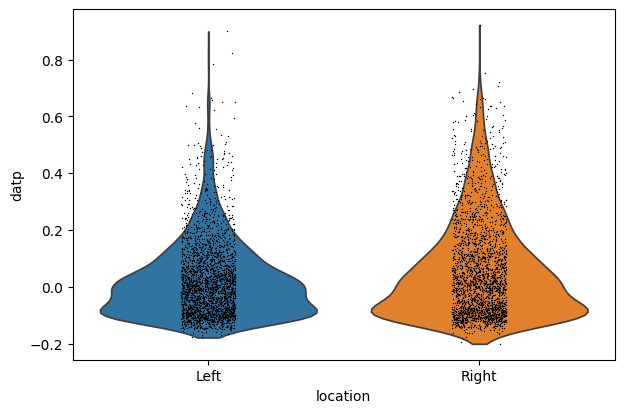

In [8]:
sc.pl.violin(subset, 'datp', groupby='location')

In [10]:
a = subset[subset.obs.location == 'Right'].obs.datp.values
b = subset[subset.obs.location == 'Left'].obs.datp.values
stats.mannwhitneyu(a, b)

MannwhitneyuResult(statistic=3452444.5, pvalue=2.939965799703976e-07)

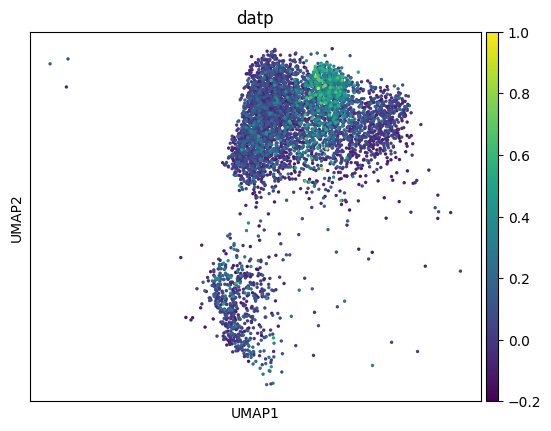

In [11]:
sc.pl.umap(subset, color = 'datp', vmax = 1)